In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<H1>Przygotowanie zbioru danych: XOR<H1>

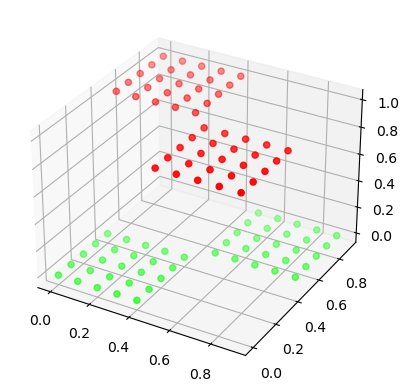

In [2]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

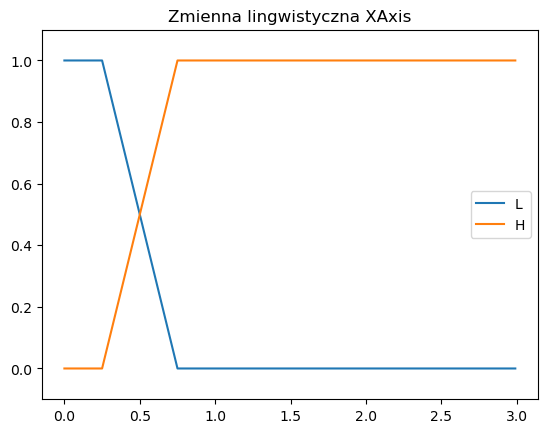

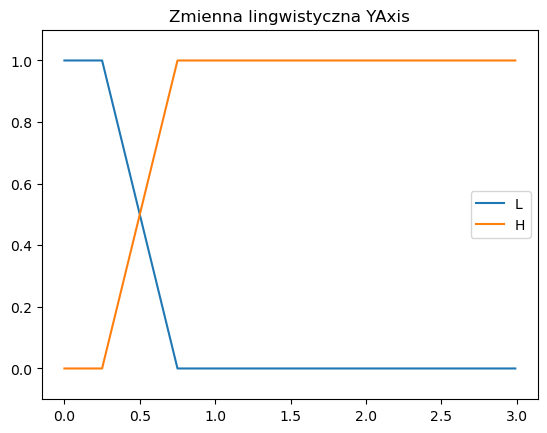

In [3]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[0.5, 0.5], [0.5, 0.5]] 
Konkluzje:  [[0.31370213 0.27788603 0.60186835]
 [0.39938511 0.83202759 0.20215673]
 [0.71342998 0.73128684 0.87489516]
 [0.50940579 0.66732606 0.59668108]]


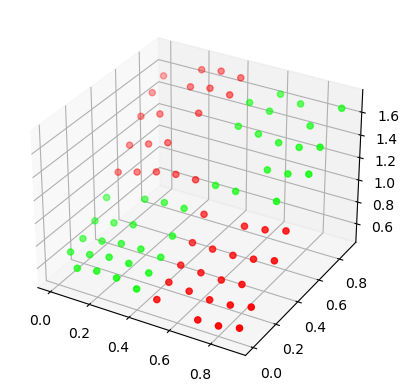

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

x0=array([0.5       , 0.5       , 0.5       , 0.5       , 0.31370213,
       0.27788603, 0.60186835, 0.39938511, 0.83202759, 0.20215673,
       0.71342998, 0.73128684, 0.87489516, 0.50940579, 0.66732606,
       0.59668108])
x0.shape=(16,)
bounds=[(0, 4), (0, 4), (0, 4), (0, 4), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2)]
x0=array([0.5       , 0.5       , 0.5       , 0.5       , 0.31370213,
       0.27788603, 0.60186835, 0.39938511, 0.83202759, 0.20215673,
       0.71342998, 0.73128684, 0.87489516, 0.50940579, 0.66732606,
       0.59668108])
x0.shape=(16,)
len(x0)=16
Optymalizacja zakończona!
z blędem:   1.401806450760108e-06
Liczba ew:  33067
Liczba it:  50
TIME elapsed:  6.508528470993042


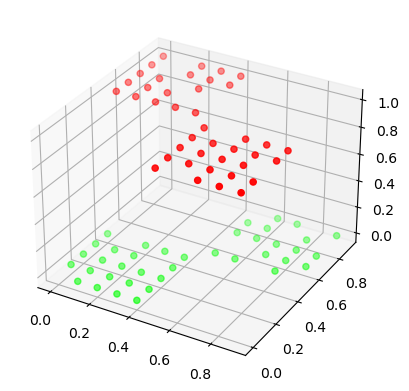

In [5]:
start = time.time()
fis.train(True, True, False, True, n_iter=50)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

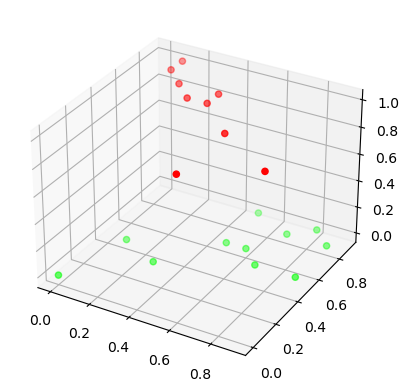

[[11  0]
 [ 0  9]]


In [6]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

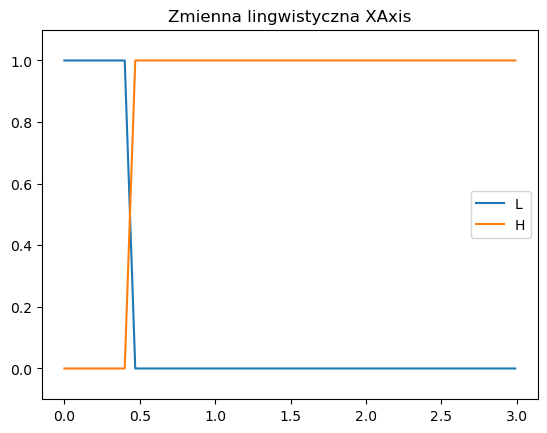

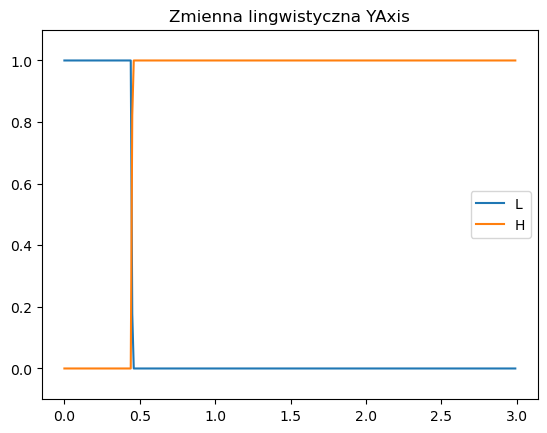

In [7]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [8]:
print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

Parametry końcowe:
Przesłanki:  array([[0.43481606, 0.06912479],
       [0.45121508, 0.00112368]]) 
Konkluzje:  array([[5.29968465e-13, 1.24912774e-13, 2.66378356e-12],
       [6.41465662e-15, 2.04920578e-12, 9.99999941e-01],
       [2.45116122e-12, 2.36366869e-12, 9.99999995e-01],
       [1.67329952e-12, 1.75615543e-12, 2.35557238e-12]])


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

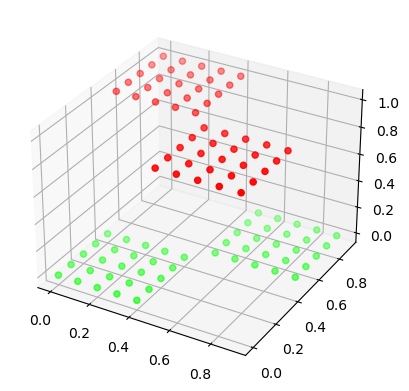

In [9]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

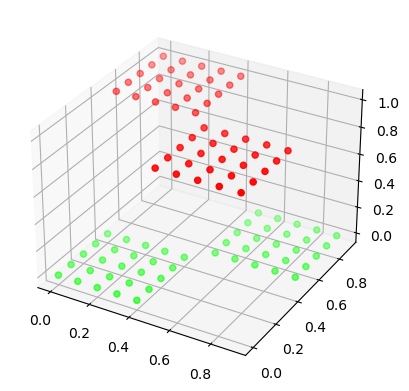

In [10]:
# fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

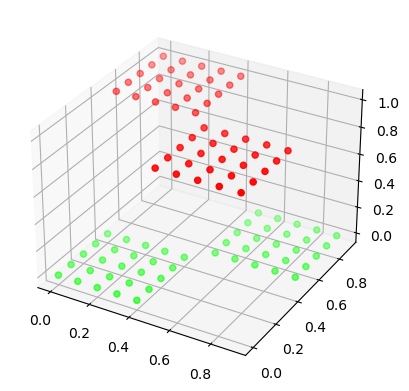

In [11]:
# fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [12]:
%matplotlib auto

Using matplotlib backend: <object object at 0x0000023743C9F4C0>


In [13]:
%matplotlib inline

In [14]:
def train_multiplication_table(n=2):
    x = np.arange(1, n, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.multiply(np.round(dataX), np.round(dataY))

    mf1 = [[n+1, 0.25, 0.5, 0.5] for n in range(n)]
    labels = [str(n+1) for n in range(n)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", labels)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", labels)

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2)

    fis = ANFIS([varX, varY], X_train.T, y_train)

    start = time.time()
    result = fis.train(True, True, False, True, n_iter=50)
    end = time.time()
    elapsed = end - start
    print("TIME elapsed: ", elapsed)

    fis.training_data = dataXY.T
    fis.expected_labels = data_labels
    fis.show_results()

    print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

    return result, elapsed

x0=array([1.        , 0.25      , 0.5       , 0.5       , 2.        ,
       0.25      , 0.5       , 0.5       , 1.        , 0.25      ,
       0.5       , 0.5       , 2.        , 0.25      , 0.5       ,
       0.5       , 0.36749522, 0.00772909, 0.10926465, 0.90347675,
       0.62324674, 0.01520323, 0.76367955, 0.18554752, 0.64279902,
       0.77325017, 0.01292443, 0.1920285 ])
x0.shape=(28,)
bounds=[(0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 4), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2)]


E:\!SIiUM2\MSI\ANFIS.py:90: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum


x0=array([1.        , 0.25      , 0.5       , 0.5       , 2.        ,
       0.25      , 0.5       , 0.5       , 1.        , 0.25      ,
       0.5       , 0.5       , 2.        , 0.25      , 0.5       ,
       0.5       , 0.36749522, 0.00772909, 0.10926465, 0.90347675,
       0.62324674, 0.01520323, 0.76367955, 0.18554752, 0.64279902,
       0.77325017, 0.01292443, 0.1920285 ])
x0.shape=(28,)
len(x0)=28
Optymalizacja zakończona!
z blędem:   2.3707215835595976
Liczba ew:  64746
Liczba it:  50
TIME elapsed:  13.984521389007568


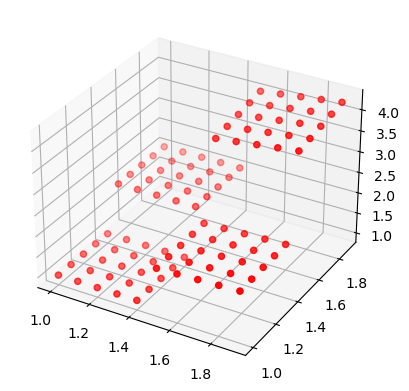

Parametry początkowe:
Przesłanki:  [[[1.93287016 2.28382545 2.53854147 1.84021552]
  [2.26150737 1.53158041 0.0848164  0.58962866]]

 [[0.93453965 0.47565128 0.72865442 0.23184214]
  [2.59063275 0.28179247 0.9842088  0.        ]]] 
Konkluzje:  [[7.13779476e-15 1.69432244e-11 1.00000044e+00]
 [3.77366172e-01 2.83011113e-01 2.00000000e+00]
 [1.56951800e-14 2.21425653e-14 2.00000000e+00]
 [1.17648203e+00 1.17644906e+00 2.00000000e+00]]


In [15]:
times = [train_multiplication_table(n) for n in range(2, 3)]

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

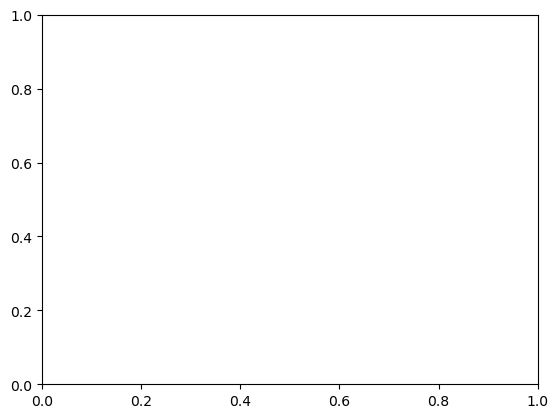

In [16]:
fig = plt.figure()
x = np.arange(2, 6, 1)
# Plotting dataset_2
ax = fig.add_subplot(111)
errors = [t[0] for t in times]
times = [t[1] for t in times]

ax.plot(x, errors, '-', label='error')

# Creating Twin axes for dataset_1
ax2 = ax.twinx()
ax2.plot(x, times, '-r', label='training times')

ax.legend(loc=0)
ax2.legend(loc=0)

ax.grid()

ax.set_xlabel("multiplication table size")
ax.set_ylabel(r"Error")
ax2.set_ylabel(r"Time")

# Setting Y limits
ax.set_ylim(0, 1000)
ax2.set_ylim(0, 1000)

# Show plot
plt.show()


In [ ]:
times

In [ ]:
errors